Covid 19 vaccine trends in US

1.	How are the vaccination trends in different states across the United States?
2.	What are the 5 states with the Highest vaccination and least vaccination? 
3.	What is the percentage of people who are vaccinated in the total vaccines distributed in different states?
4.	What vaccine is more distributed or administered (Moderna/Pfizer/Johnson-Johnson) in the US? 
5.	Analyzing Country wise distribution of COVID 19 vaccines.

Data preparation and cleaning

There are 3 datasets used in this project.

1. us_state_vaccinations.csv -contains vaccine details like vaccines ditributed, people vaccinated etc. cleand and saved as "vacdetails.csv"
2. Vaccine.csv- this dataset contains types of vaccines like moderna, pfizer etc. Cleand and saved as "vacname.csv"
3. country_data.csv- contains vaccine details of differnt countries. cleaned and saved as "countydeets.csv"
contains data for states and territories and some other info

Installing and importing required librarires

In [9]:
!pip install seaborn

In [10]:
!pip install matplotlib


In [1]:
#import required libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

Dataset 1 - vaccine details

load dataset

In [2]:
#read dataset
import pandas as pd
df = pd.read_csv("us_state_vaccinations.csv")
df


,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,1/12/21,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,1/13/21,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,1/14/21,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,1/15/21,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,1/16/21,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29791,4/13/22,Wyoming,746452.0,958885.0,338966.0,51.31,128.97,296952.0,58.57,165.68,684.0,578.0,999.0,0.778,127137.0,21.97
29792,4/14/22,Wyoming,747238.0,958885.0,339058.0,51.32,129.11,297028.0,58.58,165.68,786.0,590.0,1019.0,0.779,127281.0,21.99
29793,4/15/22,Wyoming,747983.0,962285.0,339169.0,51.34,129.24,297113.0,58.60,166.27,745.0,614.0,1061.0,0.777,127415.0,22.02
29794,4/16/22,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,570.0,985.0,NaN,NaN,NaN


Clean dataset

In [4]:
df.isnull().sum().sort_values()#finding missing values

date                                       0
location                                   0
daily_vaccinations                        65
daily_vaccinations_per_million          1748
total_vaccinations                      2869
total_distributed                       3129
share_doses_used                        3129
people_vaccinated                       3133
people_fully_vaccinated                 3213
daily_vaccinations_raw                  3967
total_vaccinations_per_hundred          4419
distributed_per_hundred                 4439
people_vaccinated_per_hundred           4443
people_fully_vaccinated_per_hundred     4518
total_boosters                         20035
total_boosters_per_hundred             20512
dtype: int64

In [5]:
#drop irrelavant data
df.drop(['share_doses_used',"total_boosters","total_boosters_per_hundred", "daily_vaccinations_raw"], inplace=True, axis=1)#drop irrelavant coloumns
df = df.dropna(axis=0)#dropping the rows with missing values
#df.shape#dimensions of the dataset
df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations,daily_vaccinations_per_million
1,1/13/21,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,1205.0
3,1/15/21,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,7478.0,1525.0
7,1/19/21,Alabama,130795.0,444650.0,114319.0,0.33,2.67,16346.0,2.33,9.07,7523.0,1534.0
8,1/20/21,Alabama,139200.0,483275.0,121113.0,0.37,2.84,17956.0,2.47,9.86,7880.0,1607.0
9,1/21/21,Alabama,165919.0,493125.0,144429.0,0.44,3.38,21345.0,2.95,10.06,10517.0,2145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29790,4/12/22,Wyoming,745768.0,957285.0,338880.0,51.29,128.86,296868.0,58.55,165.40,546.0,943.0
29791,4/13/22,Wyoming,746452.0,958885.0,338966.0,51.31,128.97,296952.0,58.57,165.68,578.0,999.0
29792,4/14/22,Wyoming,747238.0,958885.0,339058.0,51.32,129.11,297028.0,58.58,165.68,590.0,1019.0
29793,4/15/22,Wyoming,747983.0,962285.0,339169.0,51.34,129.24,297113.0,58.60,166.27,614.0,1061.0


In [20]:
#removing United ststes data from dataset
df = df[df["location"].str.contains("United States")==False]
df["location"].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Federated States of Micronesia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indian Health Svc', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Marshall Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York State', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Republic of Palau',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [10]:
#save the new data  
#df.to_csv("vacdetails.csv", encoding='utf-8', index=False)

In [6]:
#numerical columns of dataset
df.describe()

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations,daily_vaccinations_per_million
count,2.522200e+04,2.522200e+04,2.522200e+04,25222.000000,25222.000000,2.522200e+04,25222.000000,25222.000000,2.522200e+04,25222.000000
mean,1.103078e+07,1.360921e+07,5.750440e+06,43.360633,101.193583,4.703907e+06,52.388535,125.039960,4.054340e+04,3679.286972
std,4.748379e+07,5.830283e+07,2.412050e+07,21.554392,50.994320,2.023831e+07,22.592906,59.852398,1.868395e+05,2744.208388
min,6.580000e+02,6.000000e+03,6.320000e+02,0.000000,0.670000,1.000000e+00,0.280000,6.170000,0.000000e+00,0.000000
25%,8.578758e+05,1.100476e+06,4.875542e+05,29.370000,66.590000,3.347420e+05,38.470000,86.805000,2.565000e+03,1726.000000
50%,2.805098e+06,3.547815e+06,1.567274e+06,47.940000,103.725000,1.181352e+06,55.930000,126.610000,9.568000e+03,2886.000000
75%,7.341880e+06,9.252231e+06,3.815166e+06,58.947500,137.280000,3.253962e+06,67.900000,170.870000,2.469225e+04,4976.750000
max,5.693980e+08,7.180745e+08,2.567774e+08,87.760000,226.780000,2.189072e+08,100.600000,284.560000,3.384387e+06,27652.000000


In [10]:
df.columns


Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations', 'daily_vaccinations_per_million'],
      dtype='object')

In [ ]:
df.groupby(['location']).sum().plot(
    kind='pie', y='total_vaccinations', autopct='%1.0f%%', startangle=60)

In [ ]:
dfsam= df[0:50]
plt.rcParams['figure.figsize'] = (10, 8)
for col in df.columns:
    plt.plot(df[col], linewidth=2, label=str(col))
dfsam.plot(colormap='Paired', linewidth=2, fontsize=18)
plt.xlabel('date', fontsize=20)
plt.ylabel('people_vaccinated', fontsize=20)
plt.legend(fontsize=18)
plt.show()

univariate analysis

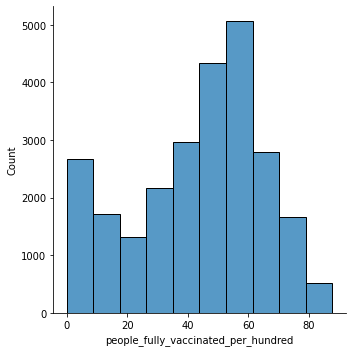

In [14]:
sns.displot(df["people_fully_vaccinated_per_hundred"],bins= 10)

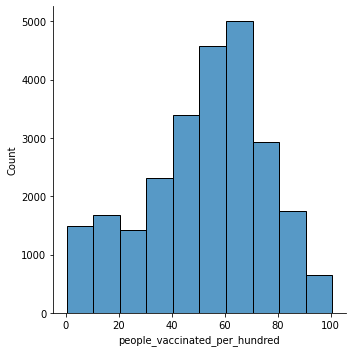

In [15]:
sns.displot(df["people_vaccinated_per_hundred"],bins= 10)

Bivariate analysis

In [16]:
corelation = df.corr()

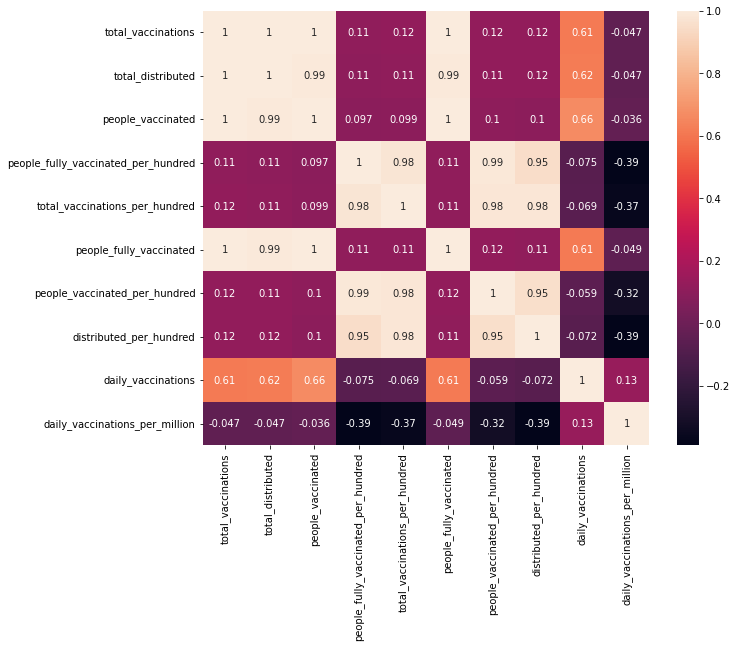

In [17]:
sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels= corelation.columns, annot=True);

C:\Users\panch\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


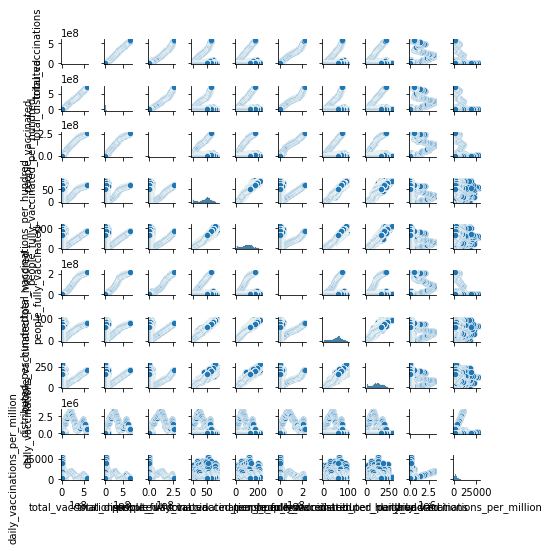

In [18]:
sns.pairplot(df, size=0.7);

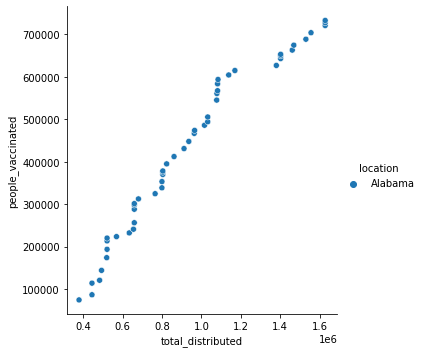

In [19]:
sns.relplot(x='total_distributed', y='people_vaccinated',hue='location',data=dfsam);

1. people fully vaccinated by city/state
2. total vaccinated to distributed
3. people fully vaccinated

C:\Users\panch\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


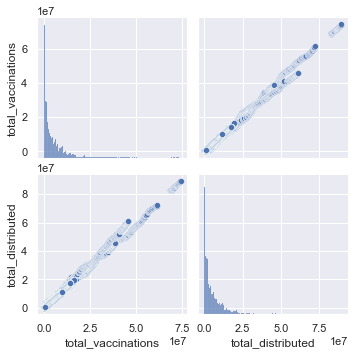

In [21]:
sns.set()
cols =['date','location','total_vaccinations','total_distributed']
sns.pairplot(df[cols], size=2.5)
plt.show();

In [23]:
time_peoplevaccinated = print(df.groupby(['location', 'people_vaccinated', 'date']).sum())
time_peoplevaccinated

                                    total_vaccinations  total_distributed  \
location people_vaccinated date                                             
Alabama  74792.0           1/13/21             84040.0           378975.0   
         86956.0           1/15/21            100567.0           444650.0   
         114319.0          1/19/21            130795.0           444650.0   
         121113.0          1/20/21            139200.0           483275.0   
         144429.0          1/21/21            165919.0           493125.0   
...                                                ...                ...   
Wyoming  338880.0          4/12/22            745768.0           957285.0   
         338966.0          4/13/22            746452.0           958885.0   
         339058.0          4/14/22            747238.0           958885.0   
         339169.0          4/15/22            747983.0           962285.0   
         339308.0          4/17/22            748879.0           965285.0   

In [24]:
state_people_vaccinated = df.groupby('location')['people_vaccinated'].sum()
state_people_vaccinated

location
Alabama                           9.077249e+08
Alaska                            1.551532e+08
American Samoa                    1.257384e+07
Arizona                           1.585508e+09
Arkansas                          6.014446e+08
California                        8.793351e+09
Colorado                          1.395939e+09
Connecticut                       1.014549e+09
Delaware                          2.349982e+08
District of Columbia              1.869867e+08
Federated States of Micronesia    1.529429e+07
Florida                           5.063862e+09
Georgia                           1.999516e+09
Guam                              4.449699e+07
Hawaii                            3.562131e+08
Idaho                             3.140111e+08
Illinois                          1.786257e+09
Indian Health Svc                 3.436522e+08
Indiana                           1.285930e+09
Iowa                              6.806980e+08
Kansas                            6.466858e+08
Kent

In [25]:
state_vaccine_distributed= df.groupby('location')['total_distributed'].sum()
state_vaccine_distributed

location
Alabama                           2.471581e+09
Alaska                            4.043808e+08
American Samoa                    2.759767e+07
Arizona                           3.837122e+09
Arkansas                          1.536882e+09
California                        1.958563e+10
Colorado                          3.242055e+09
Connecticut                       2.225703e+09
Delaware                          5.839506e+08
District of Columbia              4.774228e+08
Federated States of Micronesia    3.705941e+07
Florida                           1.223462e+10
Georgia                           5.353323e+09
Guam                              9.039520e+07
Hawaii                            8.144760e+08
Idaho                             8.502422e+08
Illinois                          3.931466e+09
Indian Health Svc                 8.292090e+08
Indiana                           3.308164e+09
Iowa                              1.674201e+09
Kansas                            1.535936e+09
Kent

In [ ]:
state_set = set(df['location'])
state_set
for state in state_set:
    df.groupby(['location']).sum().plot(
    kind='pie', y='total_vaccinations', autopct='%1.0f%%', startangle=60)
    plt.title("vaccinated vs vaccine distributed")
    plt.show()
    
  


In [66]:
loc_peoplevaccinated = print(df.groupby(['location', 'people_vaccinated']).sum())
loc_peoplevaccinated

                            total_vaccinations  total_distributed  \
location people_vaccinated                                          
Alabama  74792.0                       84040.0           378975.0   
         86956.0                      100567.0           444650.0   
         114319.0                     130795.0           444650.0   
         121113.0                     139200.0           483275.0   
         144429.0                     165919.0           493125.0   
...                                        ...                ...   
Wyoming  338880.0                     745768.0           957285.0   
         338966.0                     746452.0           958885.0   
         339058.0                     747238.0           958885.0   
         339169.0                     747983.0           962285.0   
         339308.0                     748879.0           965285.0   

                            people_fully_vaccinated_per_hundred  \
location people_vaccinated         

vaccination trends

In [67]:
df["date"] = pd.to_datetime(df["date"])
#df.set_index('date')

C:\Users\panch\AppData\Local\Temp\ipykernel_14524\46906157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


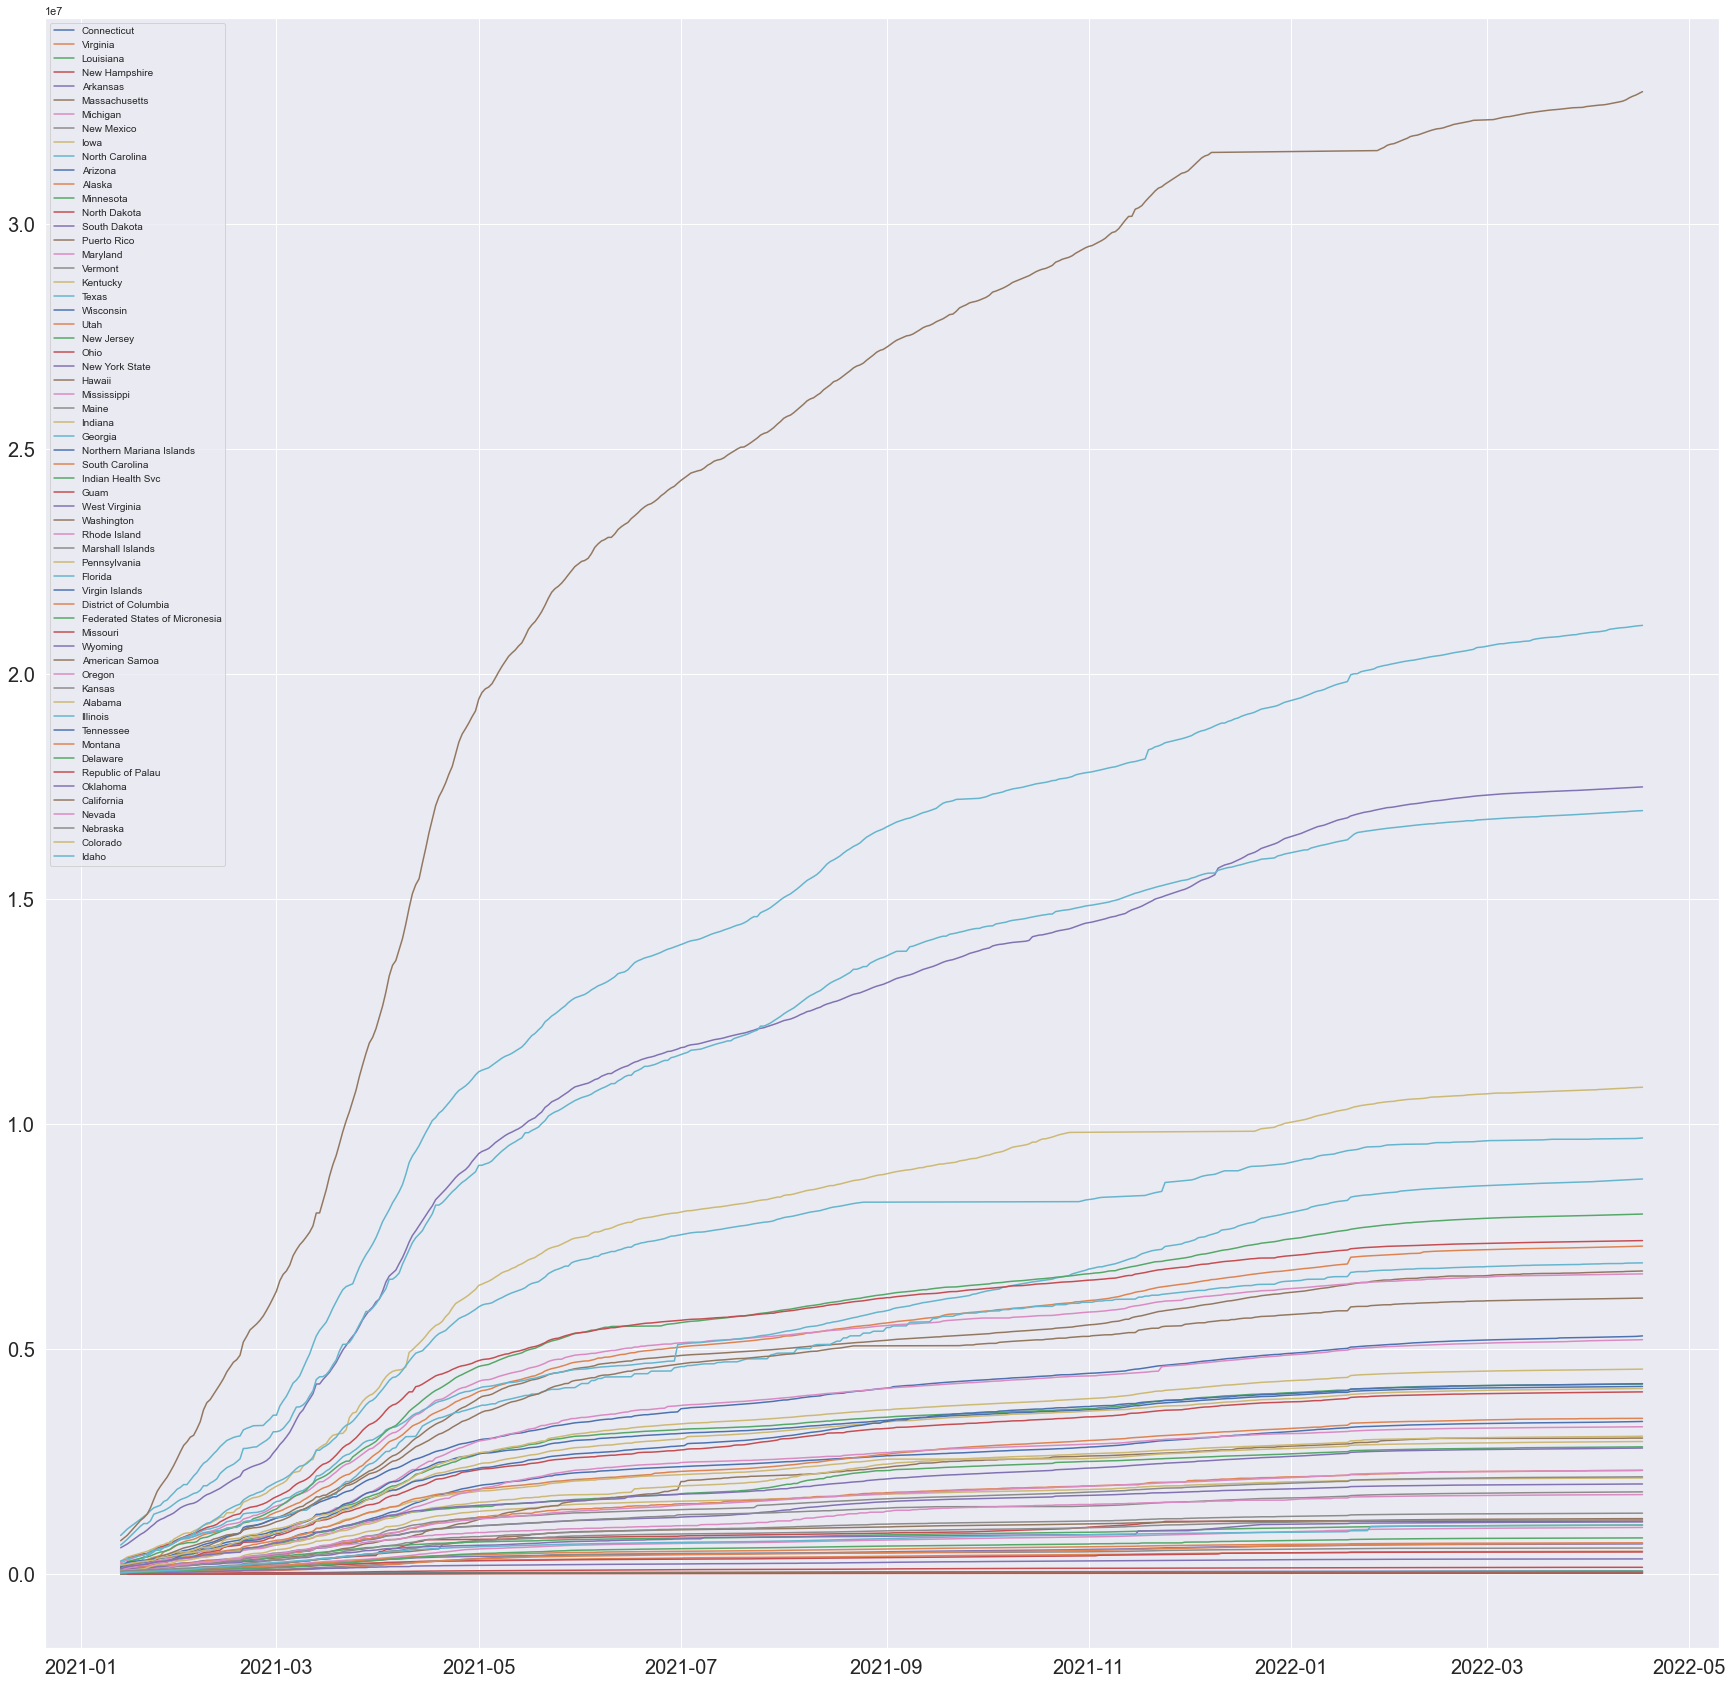

In [82]:
df1 =df[0:10000]
state_set = set(df['location'])
#plt.figure()
for state in state_set:
     selected_data = df.loc[df['location'] == state]
     plt.plot(selected_data['date'], selected_data['people_vaccinated'], label=state)
plt.legend()
plt.rcParams["figure.figsize"]=(30,30)
plt.rcParams["legend.fontsize"]=10
plt.tick_params(axis= 'x',labelsize =20)
plt.tick_params(axis= 'y',labelsize =20)


plt.show()
#plt.legend()

In [25]:
#df = df.set_index(['date', 'location']).unstack()
#df.plot()

In [72]:
#people vaccinated state wise 
state_people_vaccinated = df.groupby('location')['people_vaccinated'].sum()
state_people_vaccinated

location
Alabama                           9.077249e+08
Alaska                            1.551532e+08
American Samoa                    1.257384e+07
Arizona                           1.585508e+09
Arkansas                          6.014446e+08
California                        8.793351e+09
Colorado                          1.395939e+09
Connecticut                       1.014549e+09
Delaware                          2.349982e+08
District of Columbia              1.869867e+08
Federated States of Micronesia    1.529429e+07
Florida                           5.063862e+09
Georgia                           1.999516e+09
Guam                              4.449699e+07
Hawaii                            3.562131e+08
Idaho                             3.140111e+08
Illinois                          1.786257e+09
Indian Health Svc                 3.436522e+08
Indiana                           1.285930e+09
Iowa                              6.806980e+08
Kansas                            6.466858e+08
Kent

In [73]:
#states -vaccination high-low
state_people_vaccinated.sort_values(ascending=False)

location
California                        8.793351e+09
Texas                             6.045021e+09
New York State                    5.109694e+09
Florida                           5.063862e+09
Pennsylvania                      2.854575e+09
North Carolina                    2.396820e+09
Ohio                              2.322078e+09
New Jersey                        2.304866e+09
Virginia                          2.155720e+09
Michigan                          2.057620e+09
Georgia                           1.999516e+09
Massachusetts                     1.959481e+09
Illinois                          1.786257e+09
Washington                        1.741864e+09
Arizona                           1.585508e+09
Maryland                          1.503758e+09
Colorado                          1.395939e+09
Minnesota                         1.330541e+09
Wisconsin                         1.315405e+09
Tennessee                         1.286336e+09
Indiana                           1.285930e+09
Miss

Top 5 countries with high vaccination 
location
California        8.793351e+09
Texas             6.045021e+09
New York State    5.109694e+09
Florida           5.063862e+09
Pennsylvania      2.854575e+09
Name: people_vaccinated, dtype: float64


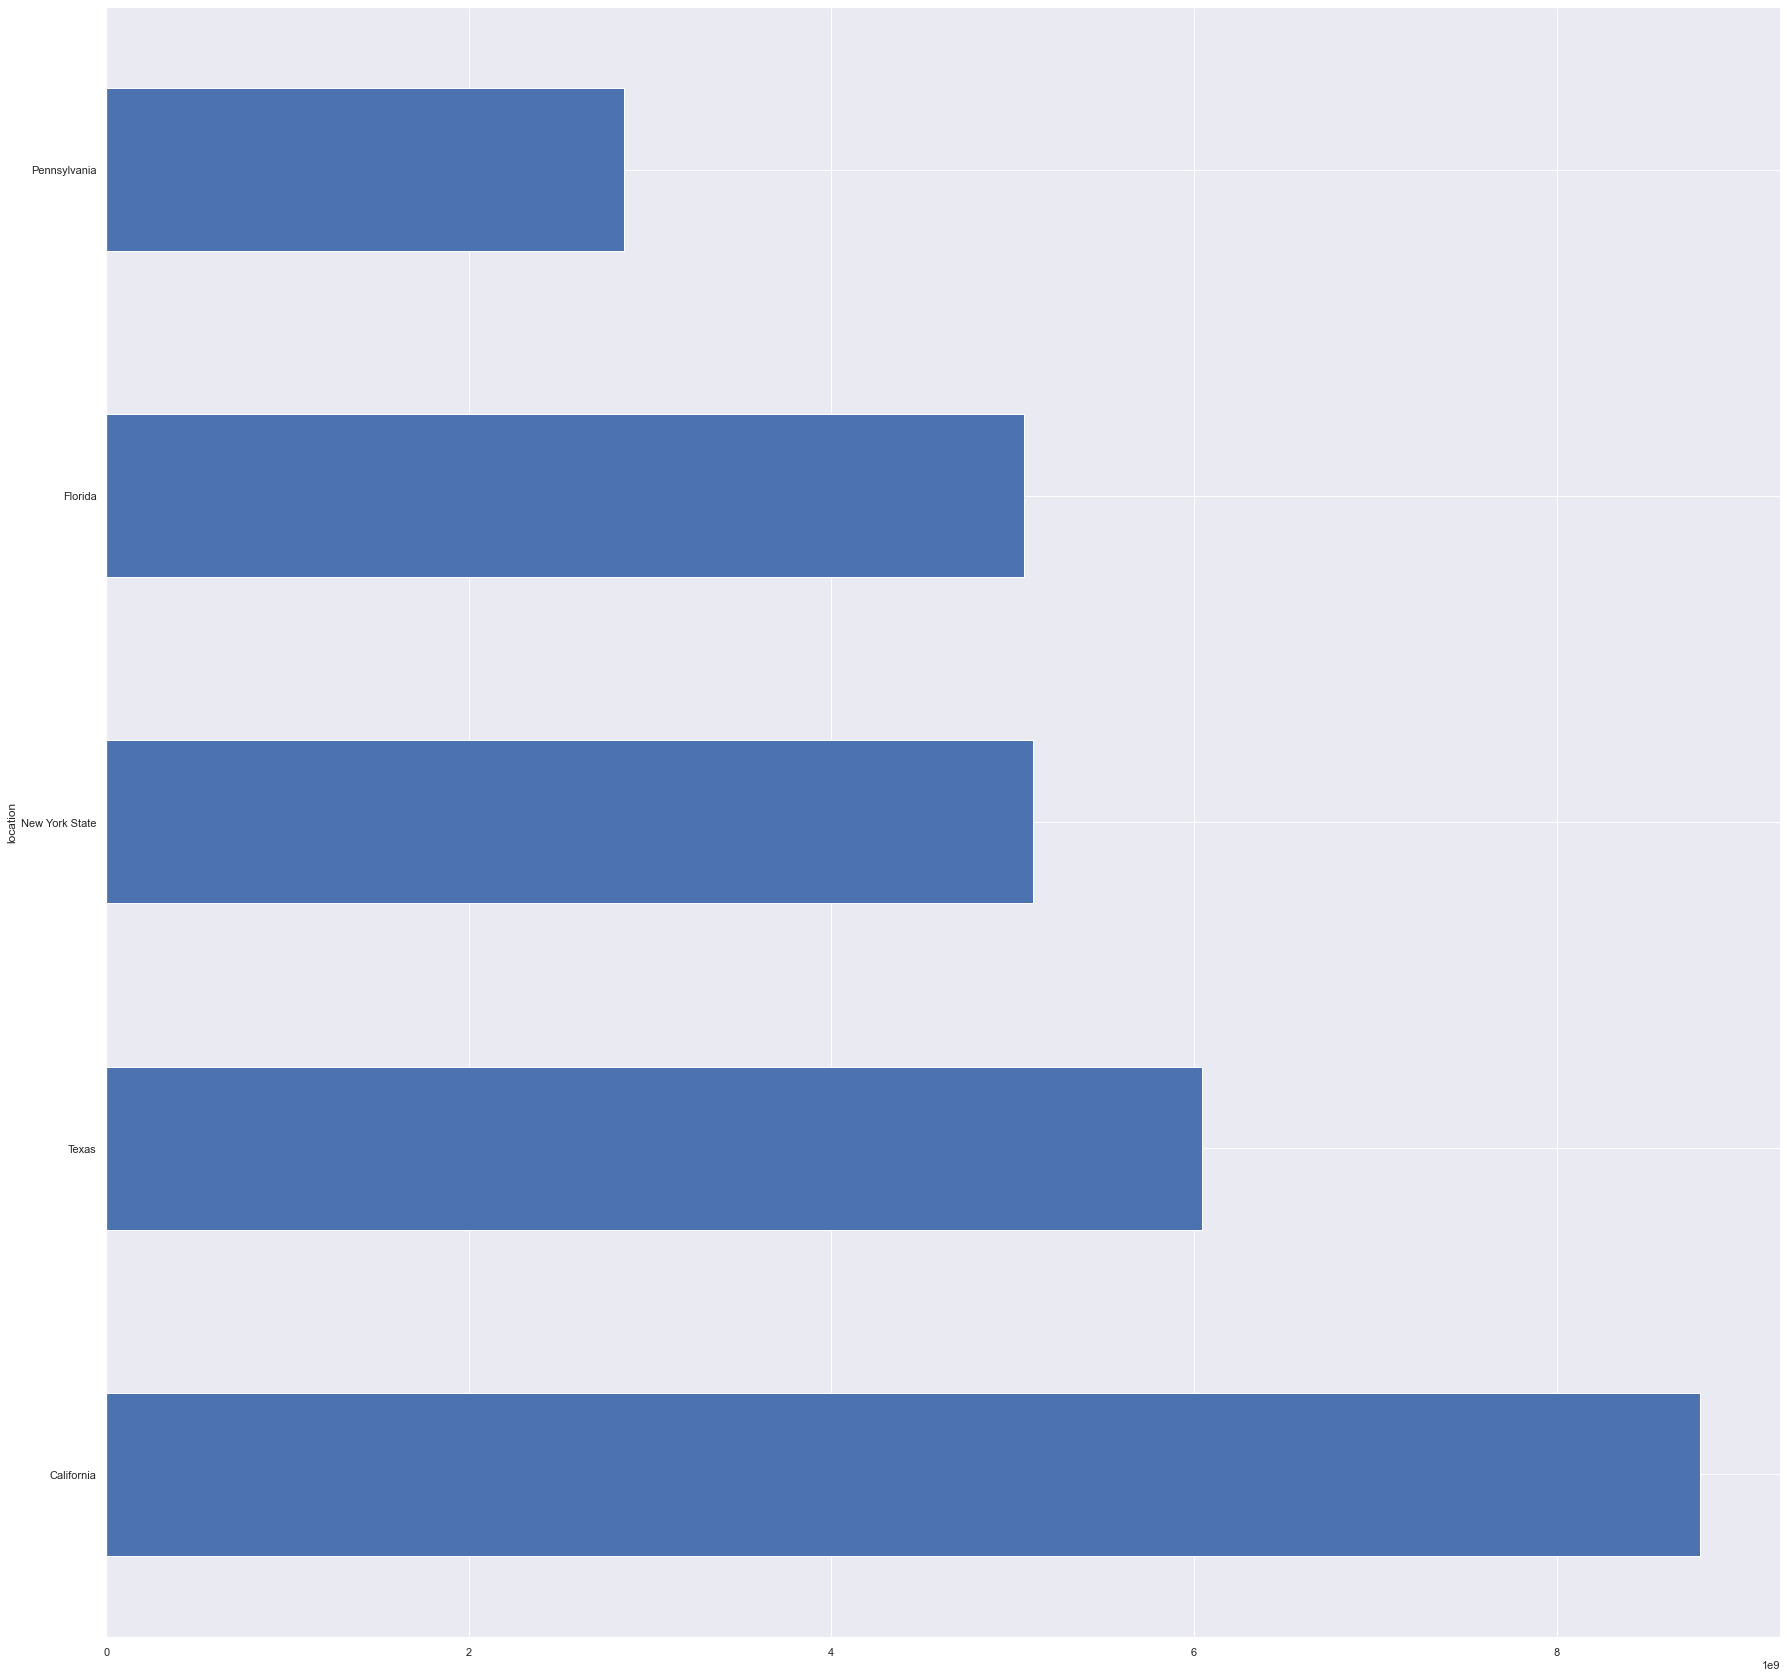

In [75]:
#top 5 
first5 = state_people_vaccinated.sort_values(ascending=False)[0:5]
print("Top 5 states with high vaccination ")
print(first5)
first5.plot(kind ='barh');

5 states with least vaccinations
location
Republic of Palau                  6082740.0
Marshall Islands                   8255986.0
American Samoa                    12573835.0
Northern Mariana Islands          13232161.0
Federated States of Micronesia    15294290.0
Name: people_vaccinated, dtype: float64


<AxesSubplot:ylabel='location'>

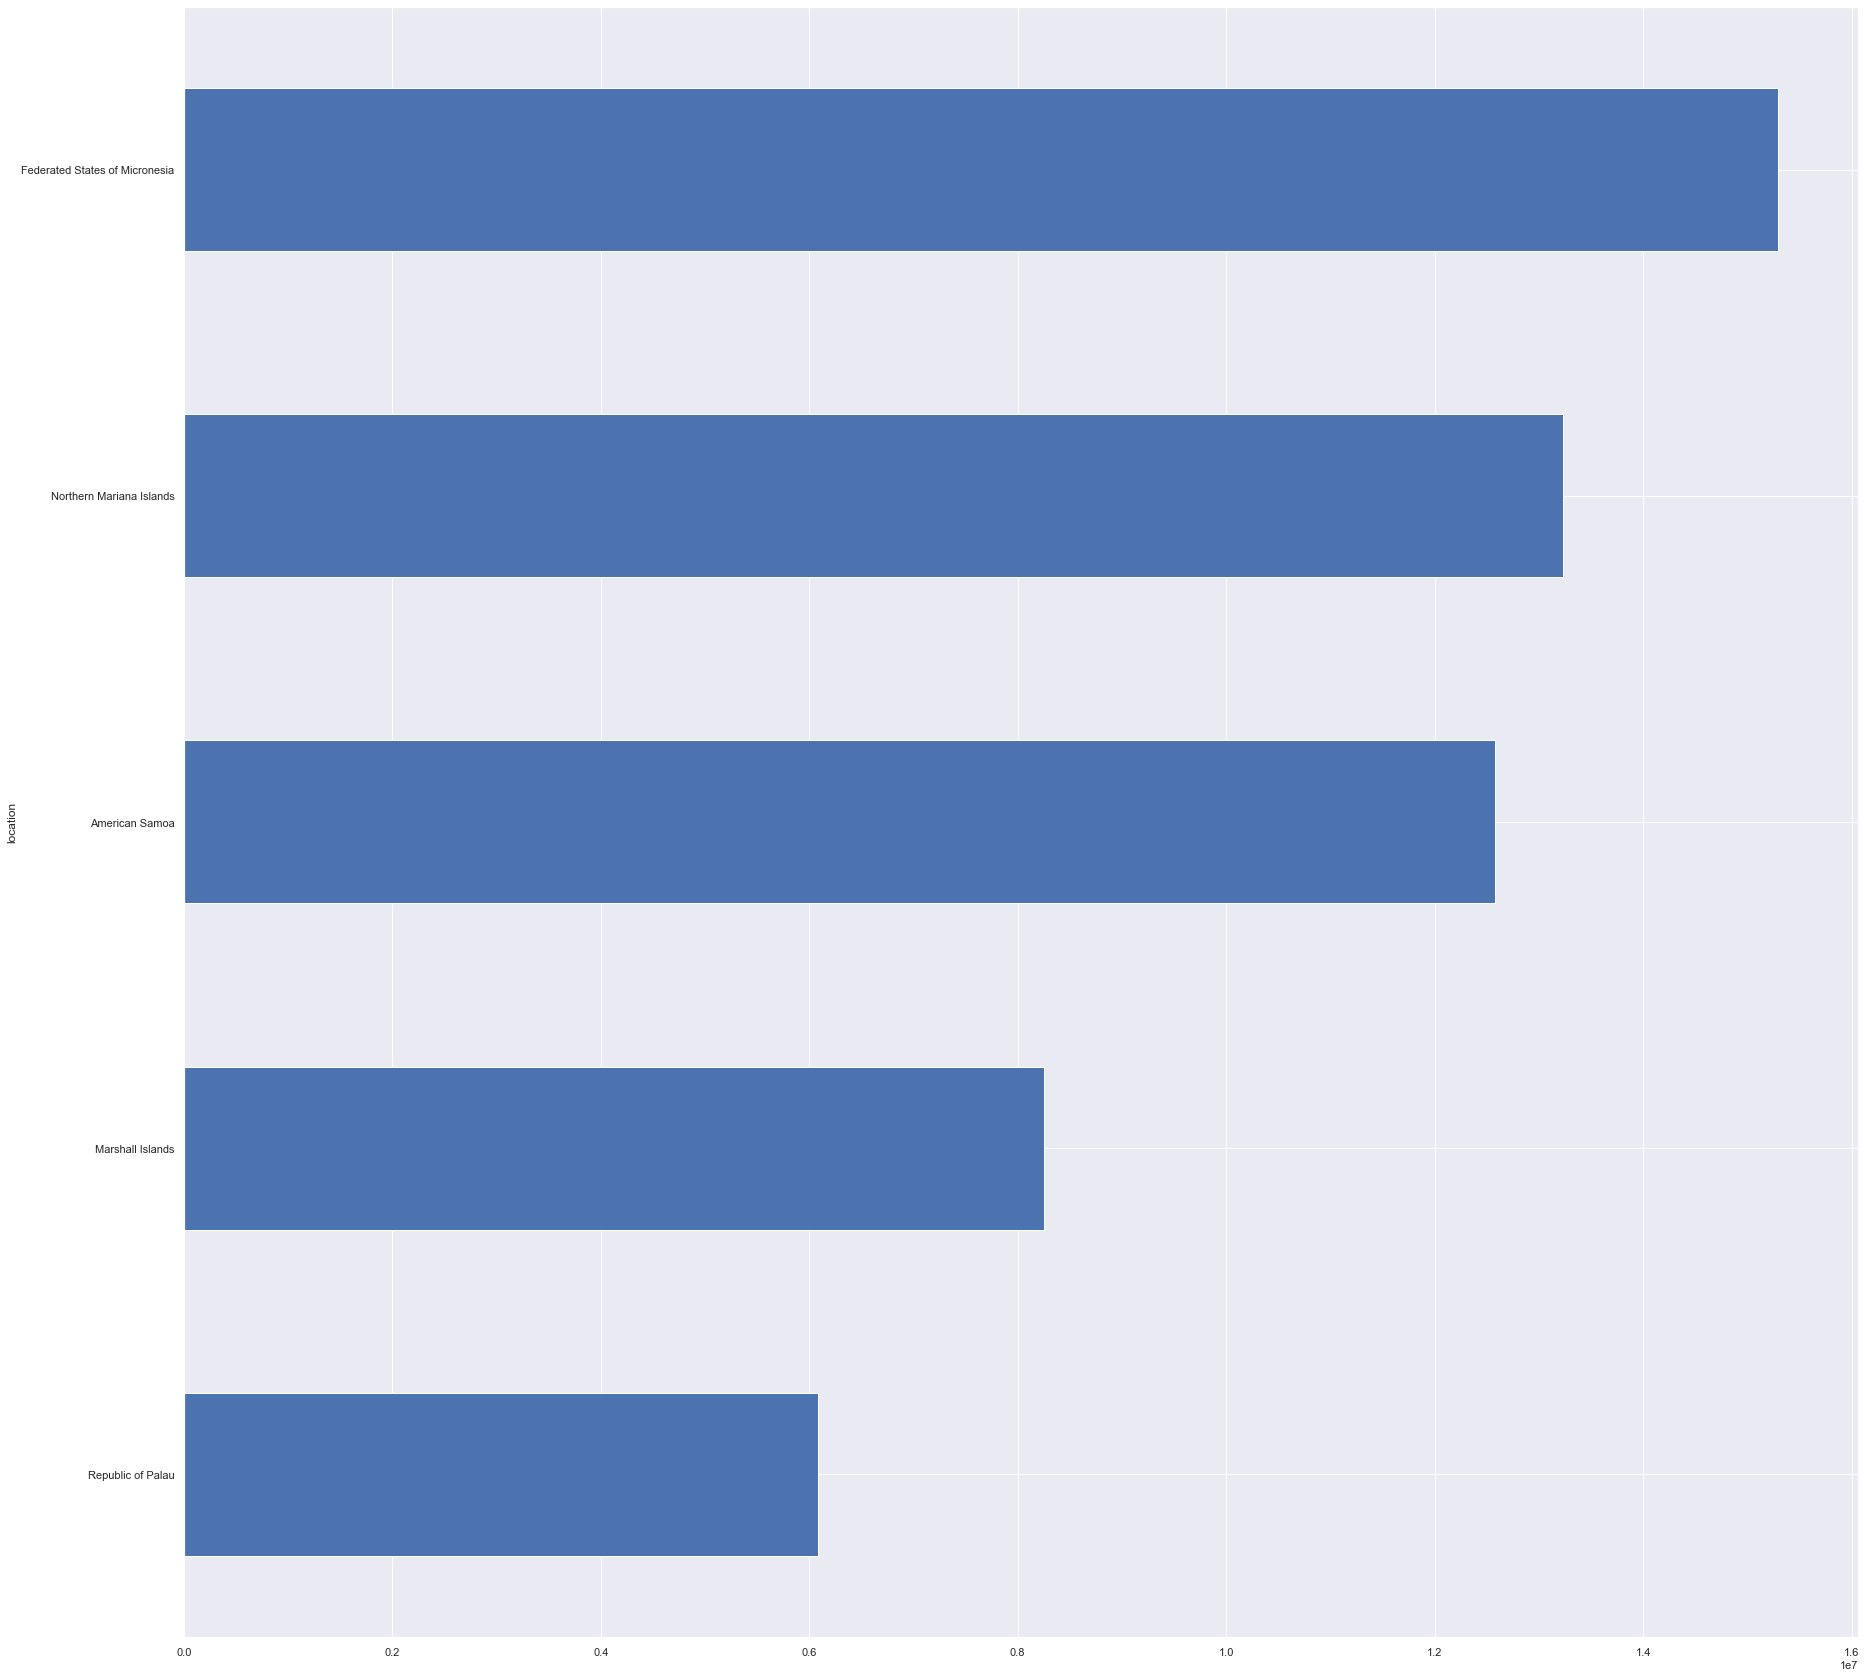

In [78]:
#least 5
least5 = state_people_vaccinated.sort_values(ascending=True)[0:5]
print("5 states with least vaccinations")
print(least5)
least5.plot(kind ='barh')

Dataset 2 - type of vaccines

In [35]:
#reading and cleaning the vaccine dataset and saving to new file
vac = pd.read_csv("Vaccine.csv", usecols = [i for i in range(7)])
vac.drop("MMWR_week", inplace=True, axis=1 )
vac.head()
#vac["Location"].unique()
#vac.to_csv("vacname.csv", encoding='utf-8', index=False)

,Date,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer
0,4/18/22,MT,1954495,104800,804200,1045495
1,4/18/22,NJ,21796255,960000,7824380,13011875
2,4/18/22,UT,6207050,245500,2107860,3853690
3,4/18/22,CT,8660025,343900,3337880,4978245
4,4/18/22,DC,1857705,70600,659680,1127425


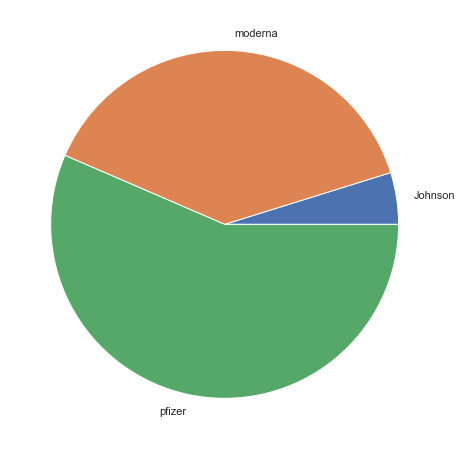

In [40]:
j =vac["Distributed_Janssen"].sum()
m =vac["Distributed_Moderna"].sum()
p =vac["Distributed_Pfizer"].sum()

y = np.array([j, m, p])
mylabels = ["Johnson", "moderna", "pfizer"]

plt.pie(y, labels = mylabels)
plt.show() 



In [86]:
vac["Date"] = pd.to_datetime(df["date"])

In [88]:
corelation = vac.corr()

<AxesSubplot:>

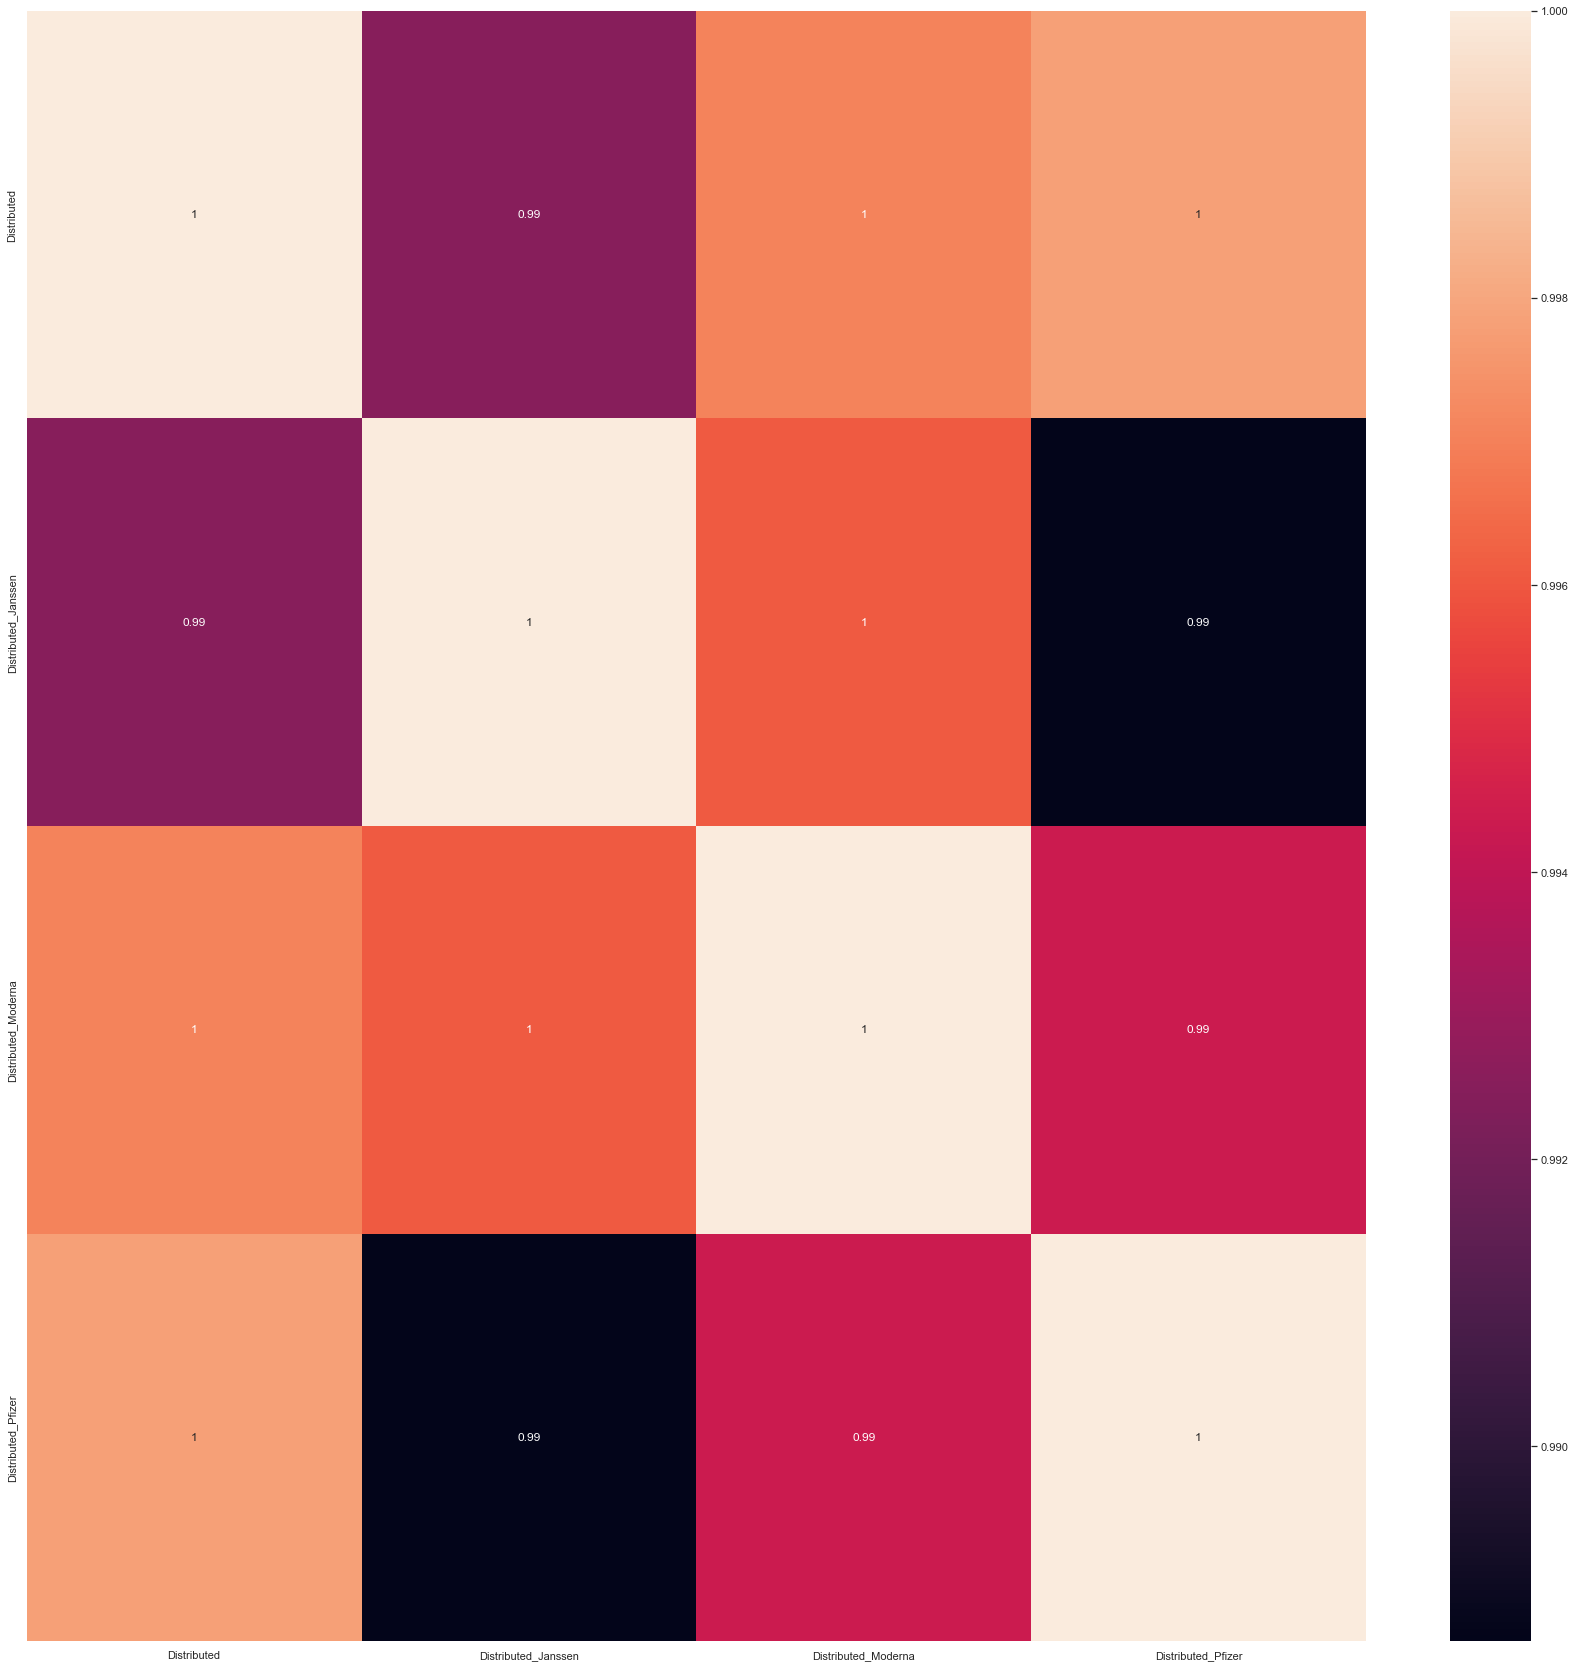

In [89]:
sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels= corelation.columns, annot=True)

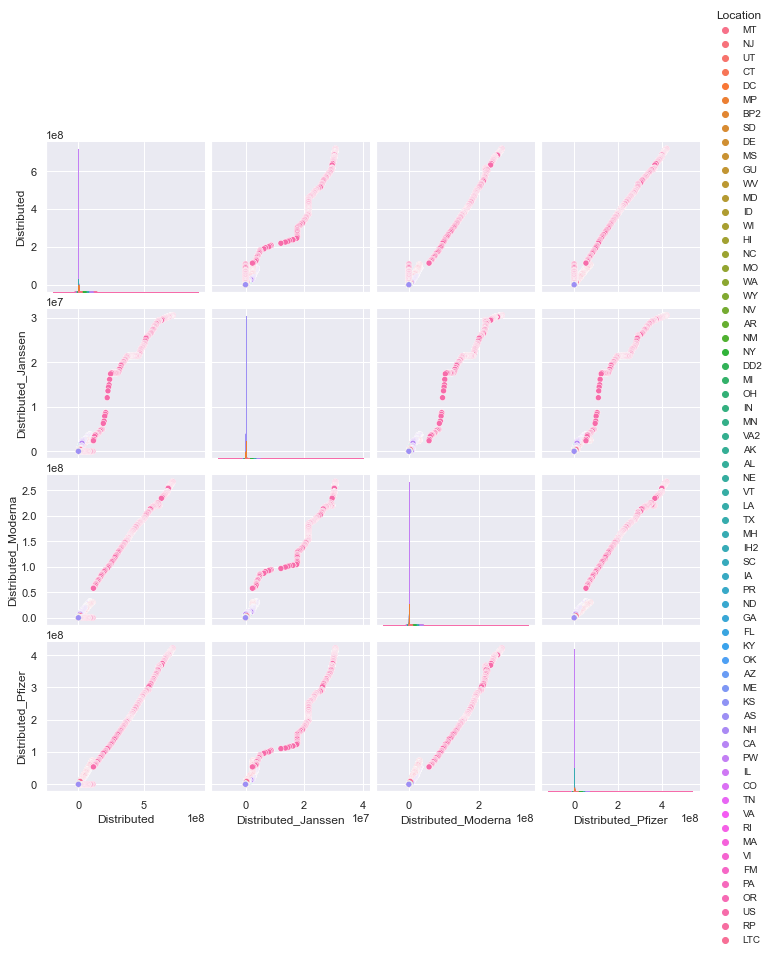

In [96]:
#sns.pairplot(vac, size=1.5);
sns.pairplot(vac, hue ='Location')


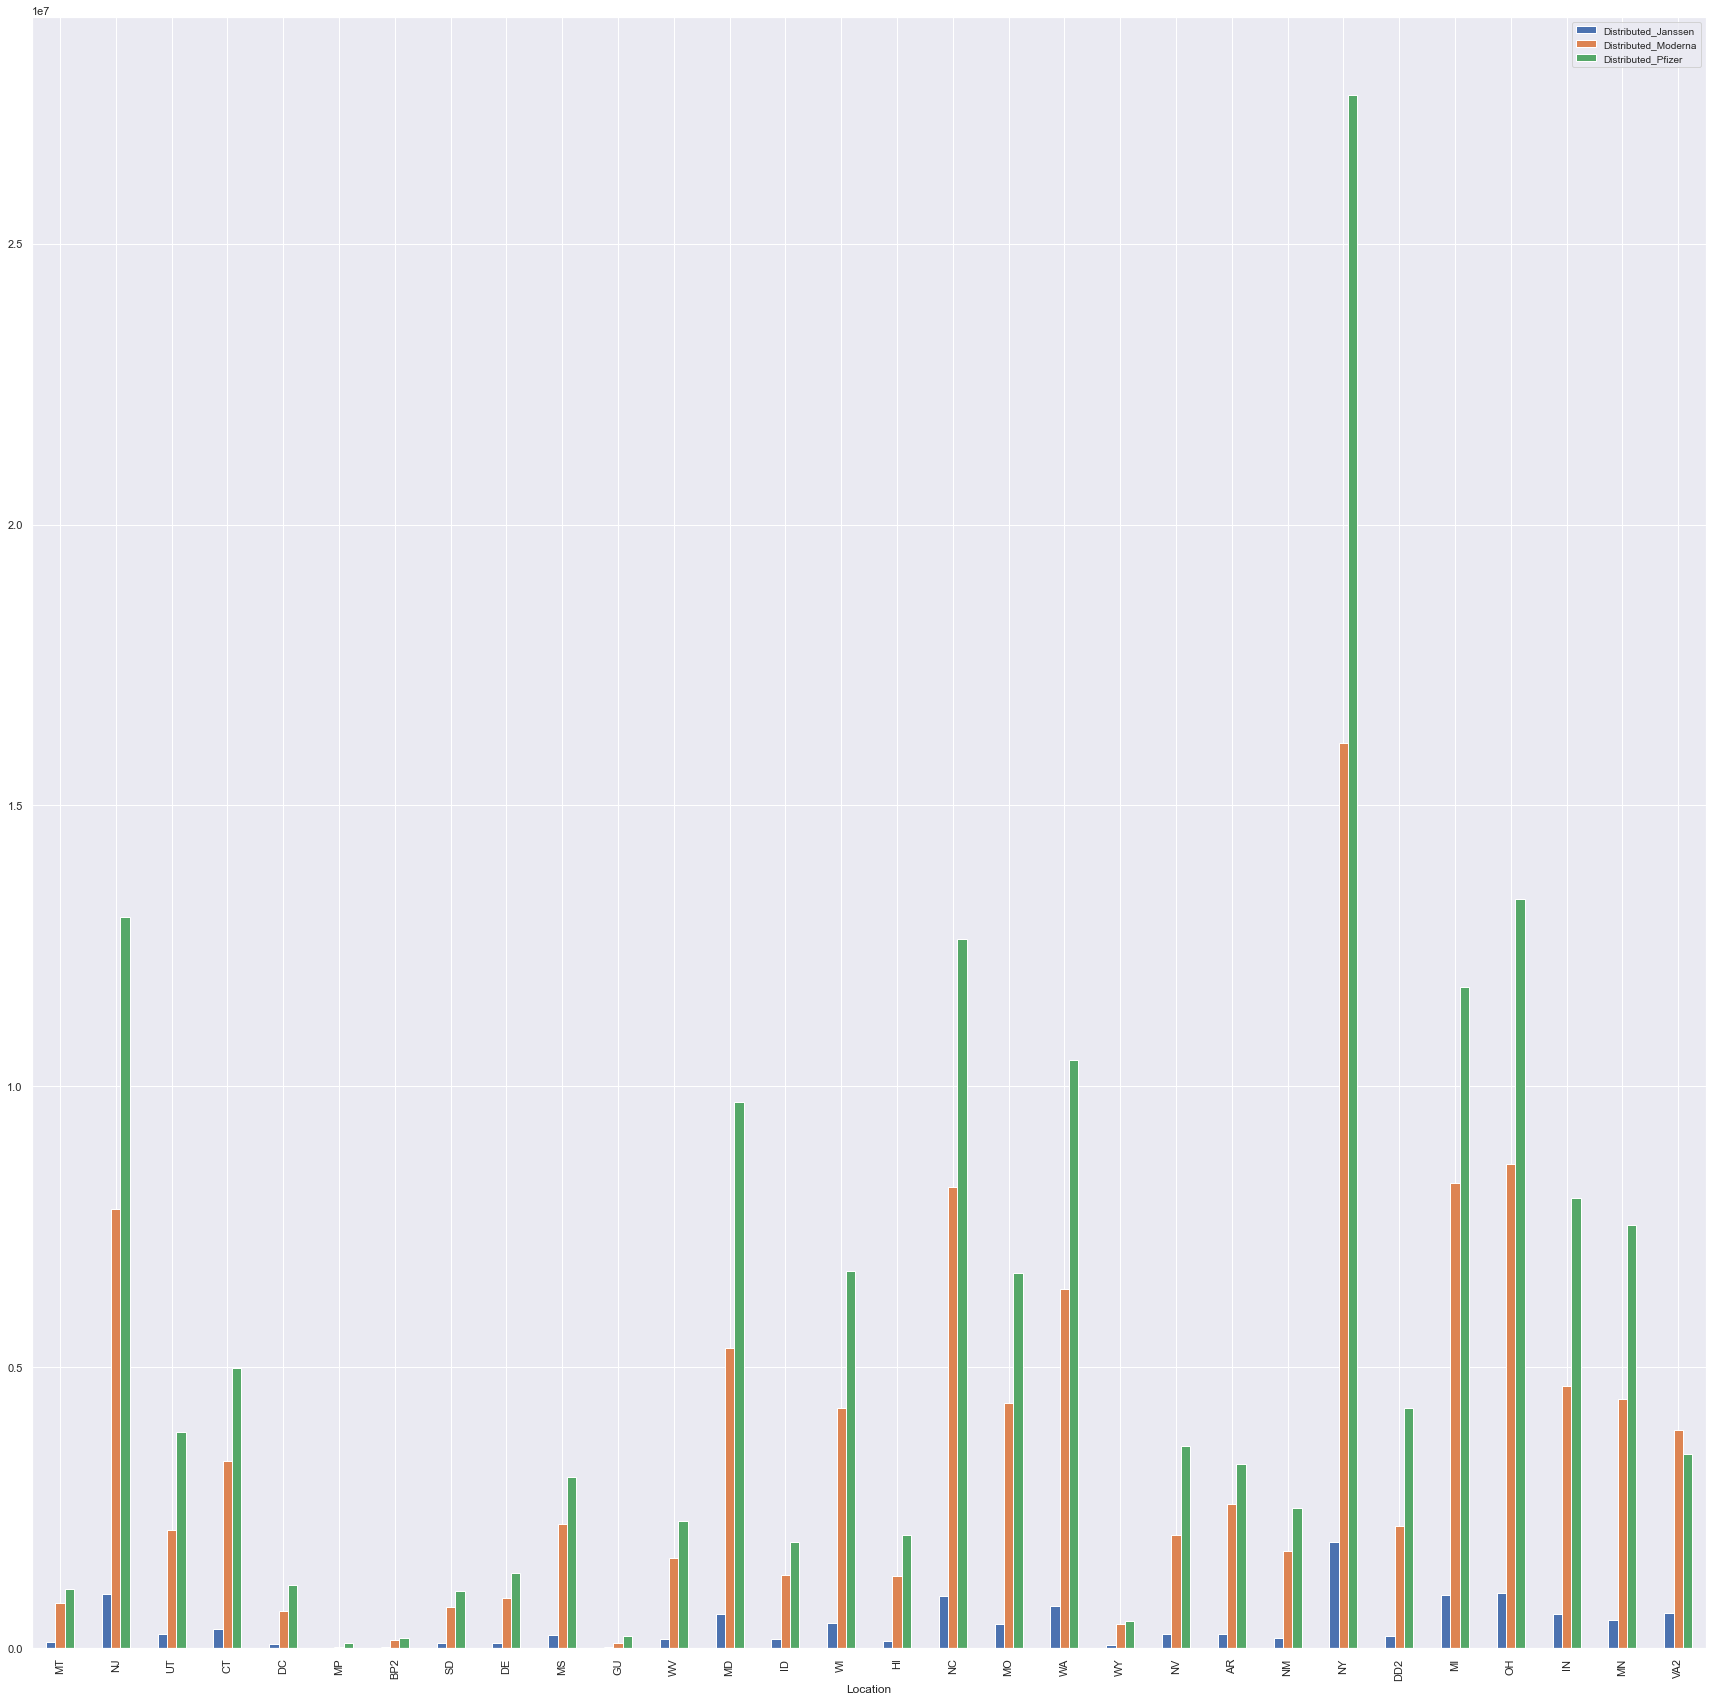

In [91]:
sample = vac[0:30]
 
sample.plot(x="Location", y=["Distributed_Janssen", "Distributed_Moderna", "Distributed_Pfizer"], kind="bar")
plt.rcParams["figure.figsize"]=(15,15)



Dataset 3 - country wise

In [92]:
#reading and cleaning the country dataset and saving to new file
df2 = pd.read_csv("country_data.csv")
#df2.head(10)
df2.drop(["iso_code","daily_vaccinations_raw",	"daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred","total_boosters_per_hundred","daily_vaccinations_per_million","daily_people_vaccinated","daily_people_vaccinated_per_hundred"], inplace=True, axis=1)
#df2.shape
df2 = df2.dropna(axis=0)
#df2.shape
#df2.to_csv("countrydeets.csv", encoding='utf-8', index=False)
df2.head(10)

C:\Users\panch\AppData\Local\Temp\ipykernel_14524\410289213.py:2: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("country_data.csv")


,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
710,Africa,10/28/21,189809912,118429867.0,76360930.0,28870.0
711,Africa,10/29/21,193296330,120094541.0,79415052.0,32750.0
712,Africa,10/30/21,194361624,120630098.0,80078265.0,71510.0
713,Africa,10/31/21,196480876,122001362.0,80759982.0,71510.0
714,Africa,11/1/21,197837482,122691032.0,81432762.0,124228.0
715,Africa,11/2/21,199146273,123401709.0,82036961.0,142786.0
716,Africa,11/3/21,199647730,123704323.0,82251189.0,153756.0
717,Africa,11/4/21,202346669,125649818.0,83140534.0,163744.0
718,Africa,11/5/21,202620703,125793512.0,83267105.0,173532.0
719,Africa,11/6/21,204717964,126953294.0,84214931.0,179218.0


After removing the non relevant coloumns and duplicates and missing values the three datasets are df, vacname and df2

In [29]:
df2

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
710,Africa,10/28/21,189809912,118429867.0,76360930.0,28870.0
711,Africa,10/29/21,193296330,120094541.0,79415052.0,32750.0
712,Africa,10/30/21,194361624,120630098.0,80078265.0,71510.0
713,Africa,10/31/21,196480876,122001362.0,80759982.0,71510.0
714,Africa,11/1/21,197837482,122691032.0,81432762.0,124228.0
...,...,...,...,...,...,...
95769,Zimbabwe,4/13/22,10082431.0,5756469.0,3605713.0,720249.0
95770,Zimbabwe,4/14/22,10108149.0,5767690.0,3611223.0,729236.0
95771,Zimbabwe,4/15/22,10123580.0,5775884.0,3615375.0,732321.0
95772,Zimbabwe,4/16/22,10136913.0,5787969.0,3616123.0,732821.0


In [178]:
corelation = df2.corr()

<AxesSubplot:>

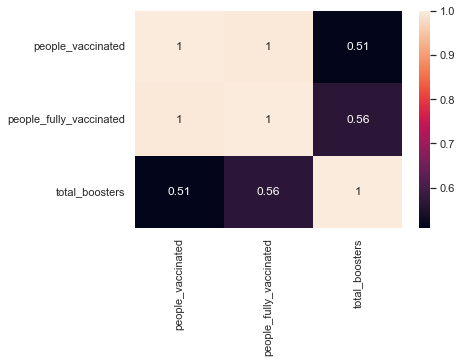

In [173]:
sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels= corelation.columns, annot=True)

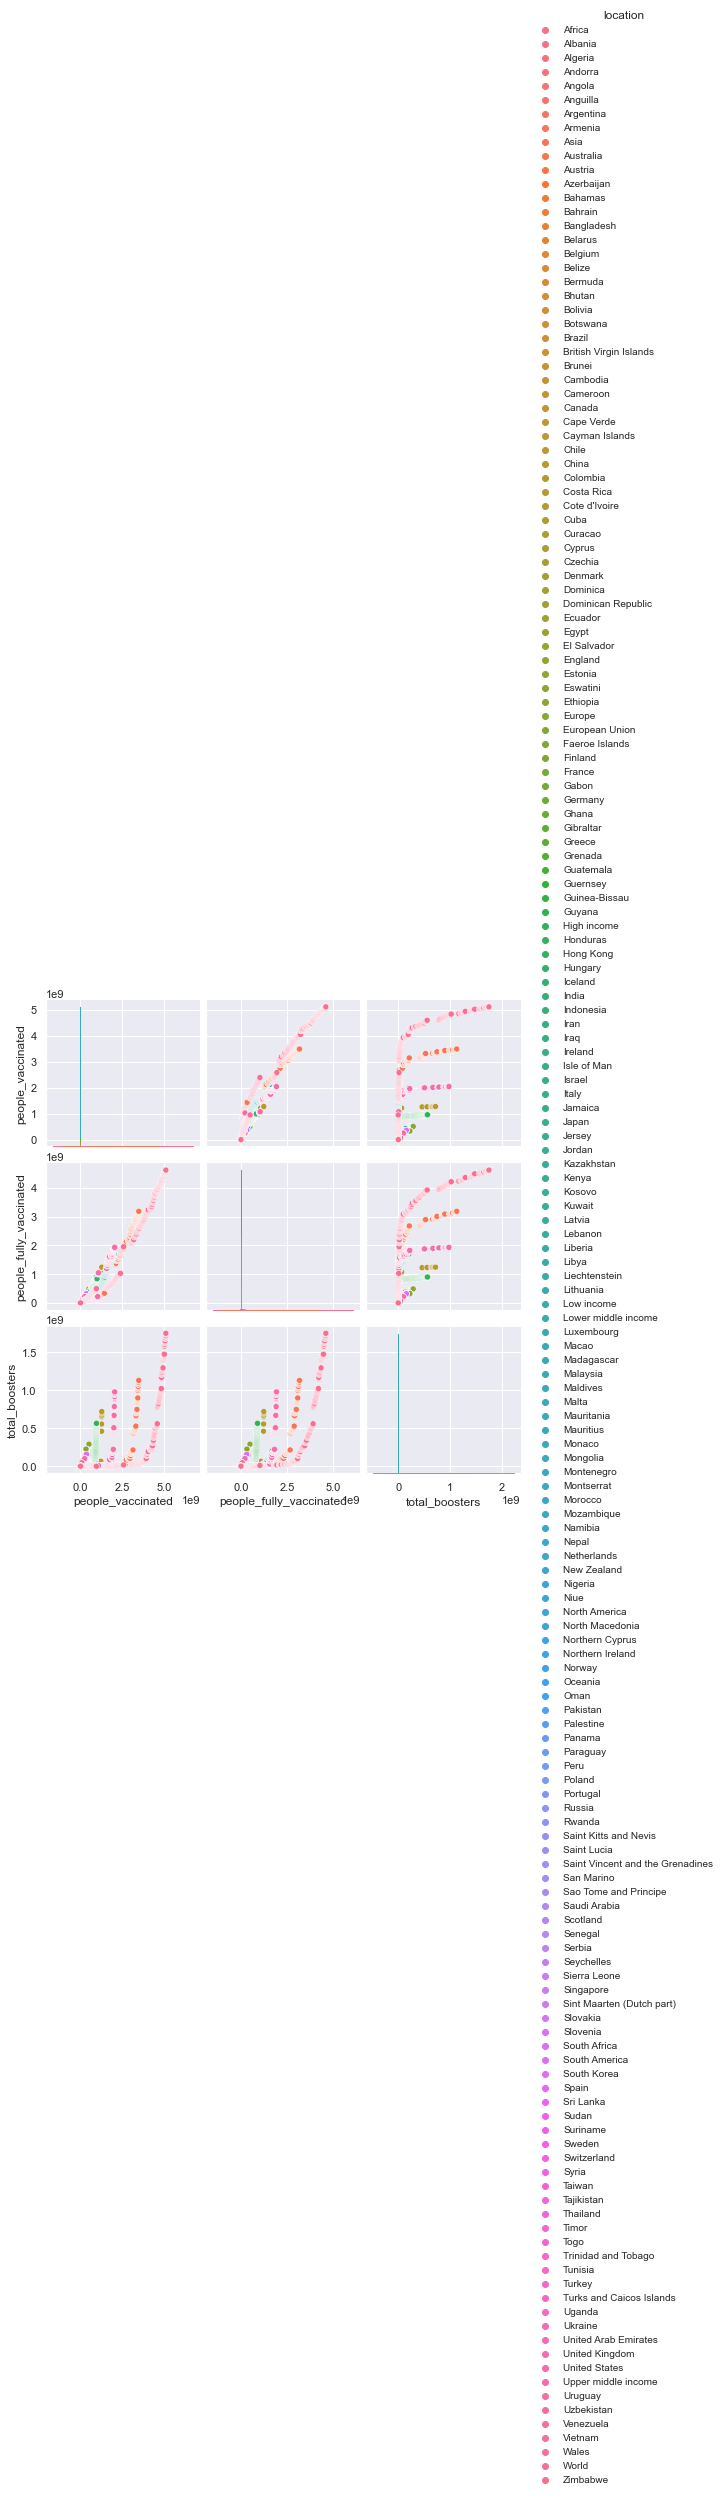

In [95]:
#sns.pairplot(df2, size=1.5);
sns.pairplot(df2, hue ='location')
fig.tight_layout()

In [100]:
#Dataset1
df.shape

(24815, 12)

In [101]:
#Dataset2
vac.shape

(31704, 7)

In [102]:
#Dataset3
df2.shape

(21007, 6)